In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

In [11]:
df = pd.read_csv("stores_sales_forecasting.csv", encoding='latin1')

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [15]:
df.set_index('Order Date', inplace=True)
df = df.sort_index()

In [16]:
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.head()

/tmp/ipython-input-1013562621.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


,Sales
Order Date,
2014-01-31,6242.525
2014-02-28,1839.658
2014-03-31,14573.956
2014-04-30,7944.837
2014-05-31,6912.787


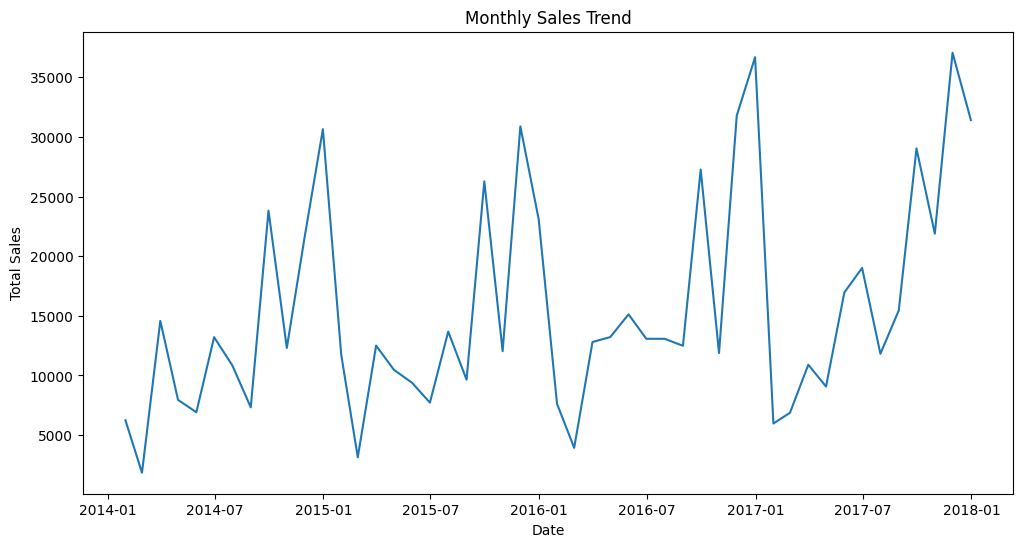

In [17]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

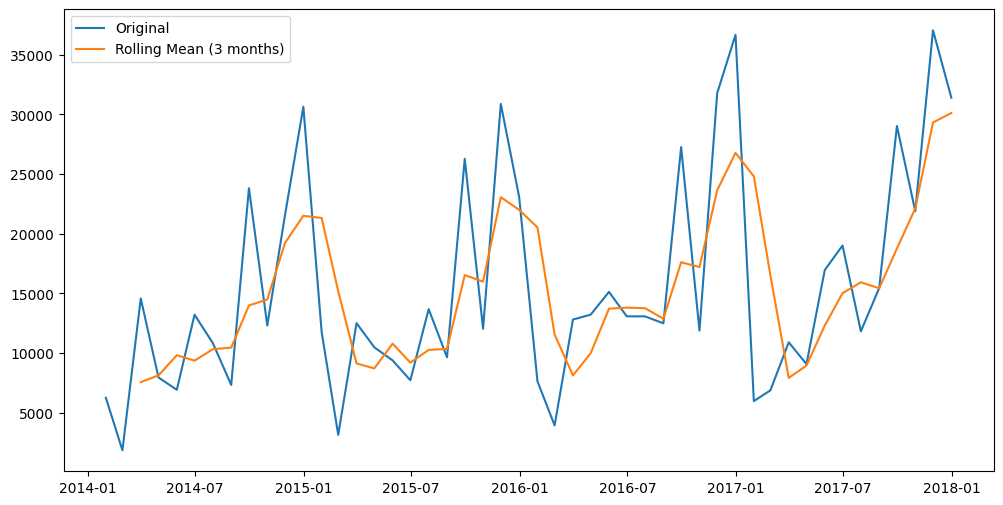

In [18]:
rolling_mean = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Original")
plt.plot(rolling_mean, label="Rolling Mean (3 months)")
plt.legend()
plt.show()

In [19]:
train_size = int(len(monthly_sales) * 0.8)

train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

In [20]:
model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)

fit_model = model.fit()

In [21]:
forecast = fit_model.forecast(len(test))

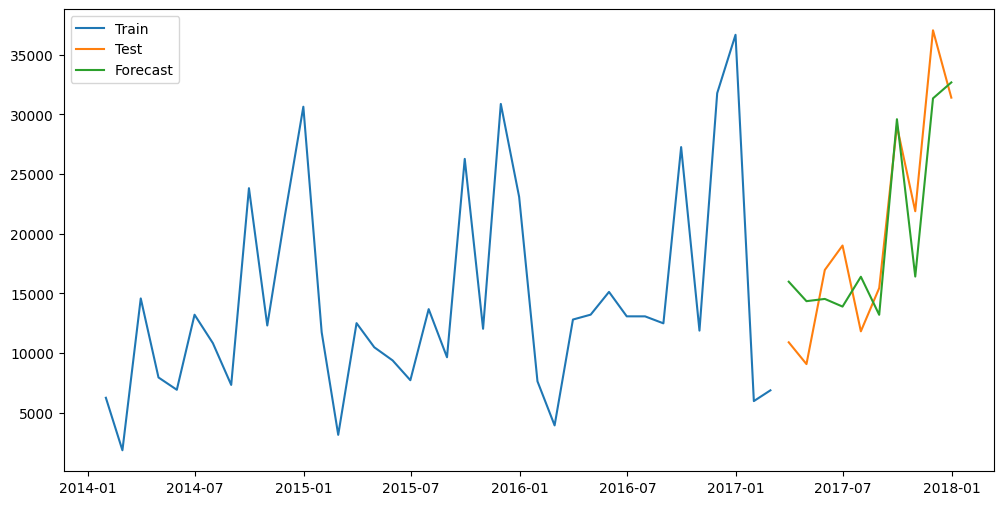

In [22]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [23]:
mae = mean_absolute_error(test, forecast)
print("MAE:", mae)

MAE: 3775.9657317046876


In [24]:
mape = np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:", mape)

MAPE: 24.583933577024553


In [25]:
future_forecast = fit_model.forecast(6)
future_forecast

,0
2017-03-31,15975.521887
2017-04-30,14342.561933
2017-05-31,14531.039230
2017-06-30,13888.638444
2017-07-31,16390.367014
2017-08-31,13199.404377


In [26]:
future_forecast_df = pd.DataFrame(future_forecast)
future_forecast_df.columns = ['forecast_sales']

future_forecast_df.to_csv("forecast_output.csv")